

#   **DESARROLLO DE UN MODELO DE MACHINE LEARNING**

## Proceso

### Seleccionamos un tema de interes
El tema de este proyecto se centra en el tratamiento de un dataset, el cual contiene datos sobre los pacientes de covid-19 en el Ecuador. Se intenta mejorar o optimizar los resultados de una investigacion previamente desarrollada sobre el mismo tema.

### Buscamos un artículo de base referente al tema: 

Articulo: https://revistas.unal.edu.co/index.php/revfacmed/article/view/86476

Dentro del paper anterior se observa la utilizacion de metodos correspondientes al modelo de probabilidad
discreta de Poisson.
Haciendo uso de una base de datos con la cual analizaron todos
los casos de COVID-19 confirmados oficialmente en Ecuador entre el 13 de marzo y el 2 de abril de 2020. 

### Buscamos y cargamos un dataset

Se utilizo un dataset basado en el articulo base encontrado, el cual nos muestra un analisis de los sintomas y enfermedades de algunos pacientes, para calcular la cantidad de personas contagiadas dentro de una region:

Dataset: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/LQDFSE

### Desarrollamos el procesamiento de datos

In [ ]:
#Importamos todas las librerias que utilizaremos en el programa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import keras
import seaborn as sns
from timeit import timeit
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from timeit import default_timer
from keras.layers import Dense
from keras.models import Sequential
from mpl_toolkits.mplot3d import Axes3D



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Realizamos la carga del dataset, asignandole a cada columna sus respectivas etiquetas
#dataset = "2.COVID19_clasificacion.xlsx"

dataset = '2.COVID19_clasificacion.xlsx'
col = ['Number','Age','Gender','Fever','Dyspnea','Nasal','Cough','PO2','CRP','Asthenia','Leukopenia','Exposicion_Covid19_paciente',
       'High_risk_zone','Temperatura','Blood Test','PT-PCR','History','Label']
df = pd.read_excel(dataset, names=col)
df = df.iloc[1:]
df.head()

,Number,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Asthenia,Leukopenia,Exposicion_Covid19_paciente,High_risk_zone,Temperatura,Blood Test,PT-PCR,History,Label
1,2,62,Male,Yes,*,Yes,Yes,97,0.75,Yes,*,*,*,*,*,*,*,COVID-19
2,3,57,Male,Yes,*,Yes,Yes,*,*,*,*,Yes,*,*,*,*,*,COVID-19
3,4,45,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,*,*,*,COVID-19
4,5,63,Male,Yes,*,Yes,Yes,*,*,*,Yes,Yes,*,*,*,*,*,COVID-19
5,6,32,Female,Yes,Yes,*,Yes,*,*,*,Yes,No,*,*,*,*,*,COVID-19


In [ ]:
#Remplazamos los valores nulos, en este caso representados con un " * ".Los sustituimos por " -1 ".

#Ademas asignamos constantes numericas a los valores aignados como "Yes/No",
#los remplazamos por "No=0", "Yes=1". 

#Y, en este caso, remplazamos las las constantes "Male/Female" por: "Male=0", "Female=1".

df['Age'] =df['Age'].replace(to_replace={'*':-1})
df['Gender'] =df['Gender'].replace(to_replace={'*':-1})
df['Dyspnea'] =df['Dyspnea'].replace(to_replace={'*':-1})
df['Nasal'] =df['Nasal'].replace(to_replace={'*':-1})
df['Fever'] =df['Fever'].replace(to_replace={'*':-1})
df['PO2'] =df['PO2'].replace(to_replace={'*':-1})
df['CRP'] =df['CRP'].replace(to_replace={'*':-1})
df['Asthenia'] =df['Asthenia'].replace(to_replace={'*':-1})
df['Leukopenia'] =df['Leukopenia'].replace(to_replace={'*':-1})
df['Exposicion_Covid19_paciente'] =df['Exposicion_Covid19_paciente'].replace(to_replace={'*':-1})
df['High_risk_zone'] =df['High_risk_zone'].replace(to_replace={'*':-1})
df['Temperatura'] =df['Temperatura'].replace(to_replace={'*':-1})
df['Blood Test'] =df['Blood Test'].replace(to_replace={'*':-1})
df['PT-PCR'] =df['PT-PCR'].replace(to_replace={'*':-1})
df['Cough'] =df['Cough'].replace(to_replace={'*':-1})

df['Dyspnea'] =df['Dyspnea'].replace(to_replace={'Yes':1})
df['Dyspnea'] =df['Dyspnea'].replace(to_replace={'No':0})

df['Gender'] =df['Gender'].replace(to_replace={'Female':1})
df['Gender'] =df['Gender'].replace(to_replace={'Male':0})

df['Fever'] =df['Fever'].replace(to_replace={'Yes':1})
df['Fever'] =df['Fever'].replace(to_replace={'No':0})

df['Nasal'] =df['Nasal'].replace(to_replace={'Yes':1})
df['Nasal'] =df['Nasal'].replace(to_replace={'No':0})

df['Cough'] =df['Cough'].replace(to_replace={'Yes':1})
df['Cough'] =df['Cough'].replace(to_replace={'No':0})

df['Asthenia'] =df['Asthenia'].replace(to_replace={'Yes':1})
df['Asthenia'] =df['Asthenia'].replace(to_replace={'No':0})

df['Leukopenia'] =df['Leukopenia'].replace(to_replace={'Yes':1})

df['Exposicion_Covid19_paciente'] =df['Exposicion_Covid19_paciente'].replace(to_replace={'Yes':1})
df['Exposicion_Covid19_paciente'] =df['Exposicion_Covid19_paciente'].replace(to_replace={'No':0})

df['High_risk_zone'] =df['High_risk_zone'].replace(to_replace={'Yes':1})

df['Label'] =df['Label'].replace(to_replace={'COVID-19':1})
df['Label'] =df['Label'].replace(to_replace={'Flu':0})



df

,Number,Age,Gender,Fever,Dyspnea,Nasal,Cough,PO2,CRP,Asthenia,Leukopenia,Exposicion_Covid19_paciente,High_risk_zone,Temperatura,Blood Test,PT-PCR,History,Label
1,2,62.0,0,1,-1,1,1,97.0,0.75,1,-1,-1,-1,-1.0,-1,-1,*,1
2,3,57.0,0,1,-1,1,1,-1.0,-1.00,-1,-1,1,-1,-1.0,-1,-1,*,1
3,4,45.0,0,1,-1,1,1,-1.0,-1.00,-1,1,1,-1,-1.0,-1,-1,*,1
4,5,63.0,0,1,-1,1,1,-1.0,-1.00,-1,1,1,-1,-1.0,-1,-1,*,1
5,6,32.0,1,1,1,-1,1,-1.0,-1.00,-1,1,0,-1,-1.0,-1,-1,*,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,62.0,1,0,-1,0,1,-1.0,-1.00,0,-1,0,1,38.3,-1,-1,*,0
126,127,63.0,0,1,-1,0,1,-1.0,-1.00,0,-1,0,1,38.5,-1,-1,*,0
127,128,63.0,1,1,-1,0,1,-1.0,-1.00,0,-1,0,1,39.3,-1,-1,*,0
128,129,40.0,1,0,-1,0,0,-1.0,-1.00,0,-1,0,1,-1.0,-1,-1,*,0


In [ ]:
#Eliminamos las columnas que producen ruido dentro de nuestro analisis y no aportana a nuestra investigacion.
df=df.drop(['History','Number','PT-PCR','Blood Test', 'PO2' , 'CRP', 'Temperatura'], axis=1)
df

,Age,Gender,Fever,Dyspnea,Nasal,Cough,Asthenia,Leukopenia,Exposicion_Covid19_paciente,High_risk_zone,Label
1,62.0,0,1,-1,1,1,1,-1,-1,-1,1
2,57.0,0,1,-1,1,1,-1,-1,1,-1,1
3,45.0,0,1,-1,1,1,-1,1,1,-1,1
4,63.0,0,1,-1,1,1,-1,1,1,-1,1
5,32.0,1,1,1,-1,1,-1,1,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...
125,62.0,1,0,-1,0,1,0,-1,0,1,0
126,63.0,0,1,-1,0,1,0,-1,0,1,0
127,63.0,1,1,-1,0,1,0,-1,0,1,0
128,40.0,1,0,-1,0,0,0,-1,0,1,0


In [ ]:
#Generamos un archivo que contendra los datos ya depurados
df.to_csv("DatosParaAnalisis.csv", sep=";",index = False) 

In [ ]:
#Seleccionamos las variables independientes y las separamos de la independiente, de esta forma:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()

,Age,Gender,Fever,Dyspnea,Nasal,Cough,Asthenia,Leukopenia,Exposicion_Covid19_paciente,High_risk_zone
1,62.0,0,1,-1,1,1,1,-1,-1,-1
2,57.0,0,1,-1,1,1,-1,-1,1,-1
3,45.0,0,1,-1,1,1,-1,1,1,-1
4,63.0,0,1,-1,1,1,-1,1,1,-1
5,32.0,1,1,1,-1,1,-1,1,0,-1


In [ ]:
y

1      1
2      1
3      1
4      1
5      1
      ..
125    0
126    0
127    0
128    0
129    0
Name: Label, Length: 129, dtype: int64

In [ ]:
#Observamos cuantos ceros y unos hay en la base, en la parte de la variable dependiente
ceros = y[y==0].count()
unos = y[y==1].count()
ceros, unos

(62, 67)

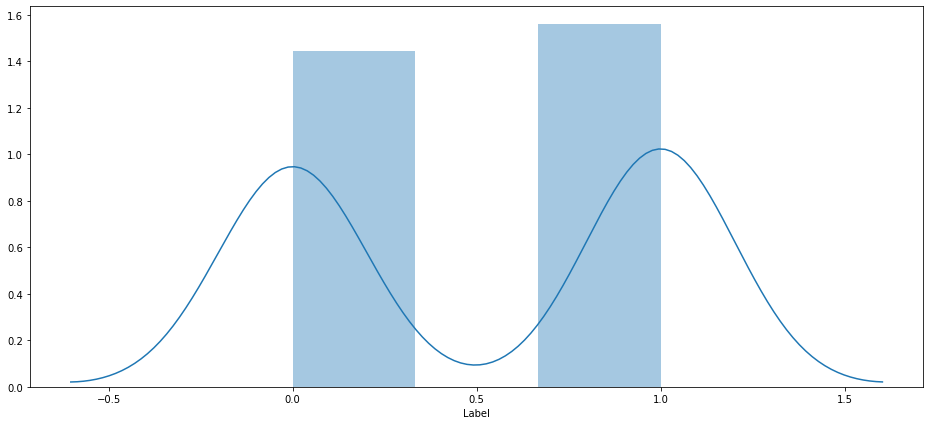

In [ ]:
#Representamos de forma grafica
fig, ax=plt.subplots(figsize = (16,7))
sns.distplot(y)

### Realizamos un Split con 20% en Test

In [ ]:
#Train: entrenaremos nuestro modelo en este conjunto de datos.
#Test: utilizaremos este subconjunto para hacer predicciones reales usando un modelo entrenado.
#Division train y test, con un split en el test del 20%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.head()

,Age,Gender,Fever,Dyspnea,Nasal,Cough,Asthenia,Leukopenia,Exposicion_Covid19_paciente,High_risk_zone
81,55.0,1,0,-1,0,0,0,-1,0,1
45,61.0,0,1,1,-1,-1,1,-1,-1,-1
100,25.0,1,1,-1,0,1,0,-1,0,1
55,53.0,1,1,1,1,-1,-1,-1,-1,-1
84,46.0,1,1,-1,0,1,0,-1,0,1


In [ ]:
X_train.shape[1]

10

###Diseñamos un modelo de Machine Learning.

###Diseñamos nuestro metodo de Random Forest

In [ ]:
#que me cree 500 arboles
#n_jobs = -1  para que coja todos los nucleos
#random state para que coja la base aleatoria del mismo modo
rf = RandomForestClassifier(n_estimators = 500, n_jobs=-1, random_state=1)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#predicciones con el random forest
y_prds = rf.predict(X_test)
#vemos la predicciones
y_prds

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0])

In [ ]:
comp = pd.DataFrame({'real': y_test, 'preds': y_prds})
comp.head(10)

,real,preds
123,0,0
105,0,0
56,1,1
57,1,1
34,1,1
120,0,0
124,0,0
36,1,1
32,1,1
52,1,1


In [ ]:
#ver que resultado nos sale
accuracy_score(y_test, y_prds)

#en los 500 arboles que ha creado aleatoriamente a podido sacar ciertos patrones
#de la solucion de estos arboles y nos ha mejorado el resultado

1.0

In [ ]:
# Calcular que tanto esta atinado con una matriz de confucion
#14 ceros que hacerto bien y 12 unos que acerto bien
#pero hay, 0 ceros que nuestro modelo dice que son 1 
#y 0 unos que nuestro modelo dice que son 0
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test, y_prds)
cm

array([[14,  0],
       [ 0, 12]])

## Metodo Propuesto

In [ ]:
#Elbow Method
x1=[]
x2=[]

with open('DatosParaAnalisis.csv', 'r') as csvfile:
    plots= csv.reader(csvfile, delimiter=';')
    for row in plots:
        x1.append(float(row[0]))
        x2.append(float(row[1]))

In [ ]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

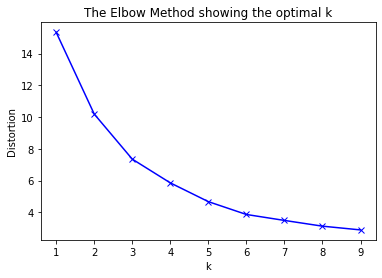

Tiempo de ejecucion:  0.13785525299954315


In [ ]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
inicio  = default_timer()

plt.show()
fin = default_timer()
print ('Tiempo de ejecucion: ', fin - inicio)

In [ ]:
#Estandarizacion de los datos
x=df
x = StandardScaler().fit_transform(x)

In [ ]:
#PCA con todos los datos
pca = PCA()
principalComponents = pca.fit_transform(x)
principalComponents

num_components=principalComponents.shape[1]
num_components
explained_variance_ratio_=pca.explained_variance_ratio_
explained_variance_ratio_
#print('Varianzas:')
#print(np.around(explained_variance_ratio_, decimals=3))

a = range(1,num_components+1)
num_pc= a[::1]

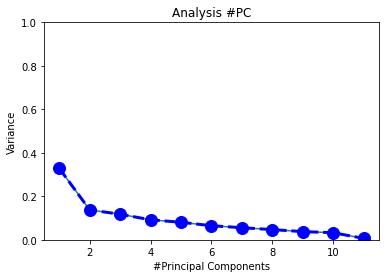

Timepo de ejecucion:  0.1343301490005615


In [ ]:
#Visualizar en 2D


plt.plot(num_pc, explained_variance_ratio_)
plt.plot(num_pc, explained_variance_ratio_, color='blue', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylim((0,1))
plt.title('Analysis #PC')
plt.xlabel('#Principal Components')
plt.ylabel('Variance')

inicio  = default_timer()

plt.show()
fin = default_timer()
print ('Timepo de ejecucion: ', fin - inicio)


In [ ]:
#Reduccion de componentes con PCA
num_components=3
pca = PCA(num_components)
principalComponents = pca.fit_transform(x)

explained_variance_ratio_=pca.explained_variance_ratio_
explained_variance_ratio_
print('Varianzas:')
print(np.around(explained_variance_ratio_, decimals=3))
a = range(num_components)
num_pc= a[::1]

principalDf = pd.DataFrame(data = principalComponents
             , columns = num_pc)

principalDf=round(principalDf, 2)
#print(principalDf)
#Explicación de la varianza
explained_variance_ratio_
a = range(num_components)
num_pc= np.linspace(1,num_components,num_components)

Varianzas:
[0.328 0.137 0.118]


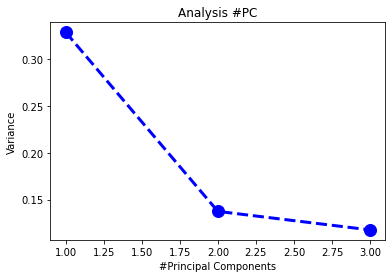

Tiempo de ejecucion:  0.1646087119997901


In [ ]:
#Visualización en 2D
import matplotlib.pyplot as plt

#plt.plot(num_pc, explained_variance)
plt.plot(num_pc, explained_variance_ratio_, color='blue', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)

#plt.ylim((0,0.4))
plt.title('Analysis #PC')
plt.xlabel('#Principal Components')
plt.ylabel('Variance')

inicio  = default_timer()

plt.show()
fin = default_timer()
print ('Tiempo de ejecucion: ', fin - inicio)

In [ ]:
#Kmeans Clustering 
def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

inicion = default_timer()

clust_labels, cent = doKmeans(principalDf, 3)
kmeans = pd.DataFrame(clust_labels)
kmeans
fin = default_timer()
print ('Tiempo de ejecucion: ', fin - inicio)

Tiempo de ejecucion:  1.091537877000519


Timepo de ejecucion:  0.02089941599933809


Text(0.5, 0, '3ER FACTOR')

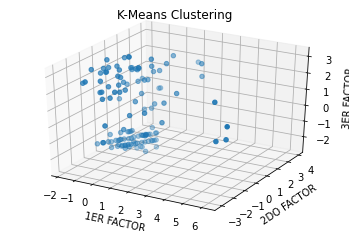

In [ ]:

#Visualización de grupos de usuarios en 3D
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

inicio  = default_timer()

ax = plt.axes(projection='3d')
fin = default_timer()
print ('Timepo de ejecucion: ', fin - inicio)


# Data for a three-dimensional line
zline = np.linspace(-5, 5, 11)
xline = np.linspace(0, 10, 11)
yline = np.linspace(0, 15, 11)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = principalDf[0]
xdata = principalDf[1]
ydata = principalDf[2]
#ax.scatter3D(xdata, ydata, zdata, c=zdata);
ax.scatter3D(xdata, ydata, zdata);
ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
ax.set_zlabel('3ER FACTOR')

Tiempo de ejecucion:  0.01618665299974964
Se creo el archivo con etiquetas


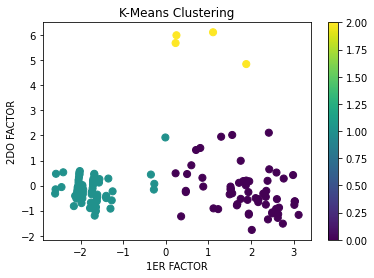

In [ ]:
#Visualización de grupos  en 2D

#determinar el numero de clusters

#Datamining: Clustering (método no supervisado de Machine Learning)
num_clusters=
clust_labels, cent = doKmeans(principalDf, num_clusters)
kmeans = pd.DataFrame(clust_labels)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf[0],principalDf[1],
                     c=kmeans[0],s=50)

ax.set_title('K-Means Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')

inicio  = default_timer()

plt.colorbar(scatter)
fin = default_timer()
print ('Tiempo de ejecucion: ', fin - inicio)


#agregar etiquetas
new_ds= df
new_ds['etiqueta'] = kmeans
new_ds.to_csv('datasetConEtiquetas.csv')
print("Se creo el archivo con etiquetas")

#print(timeit("'Hello, world!'.replace('Hello', 'Goodbye')"))